In [117]:
# refer URL  :
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
#-------------------- Load data ----------------------------
#-----------------------------------------------------------
#----- dataset has 1,460 rows and 81 columns  
#----- numeric : 38 
#----- string : 43
#-----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
plt2.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
 
# read the data

define_fileName = 'train'; # train or test <== เลือกว่าจะ crean ข้อมูล train หรือ test
df = pd.read_csv('file_price_house/'+define_fileName+'.csv') 
 

print(df.shape) # แสดง (Row, column)
print(df.dtypes) # แสดง data type

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

print("----------------------------------------")
print("### String Columns -> ",len(non_numeric_cols))
print(non_numeric_cols) 

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
----------------------------------------
### numeric columns ->  38
['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
----------------------------------------
### String Columns ->  43
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilitie

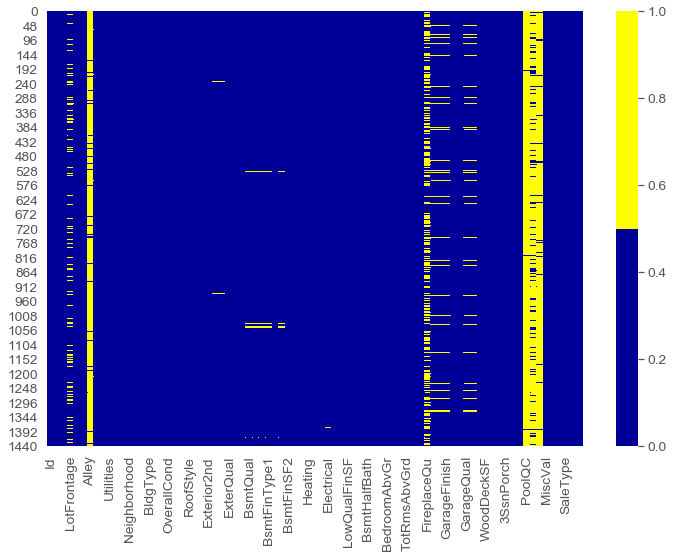

In [118]:
#1: find Missing Data Heatmap
##----------------------------------------------------------------------
## แถบสีเหลืองแทน ข้อมูลจำนวนที่หายไป(missing value)
## สีน้ำเงินแสดงข้อมูลทั่วไป
 
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))
 

In [119]:
# แสดง missiong value เป็น % เพื่อเลือก column มา clean ข้อมูล
# ตัวที่มีค่า missing value > 50 % ค่าที่เป็น null 
# Scan Column Missing Value ลบไป 4 Feature ข้อมูล missing เยอะเกินที่ทีมจะยอมรับ 
#---------------------------
#Remove :  Alley ==> 94.0 %
#Remove :  PoolQC ==> 100.0 %
#Remove :  Fence ==> 81.0 %
#Remove :  MiscFeature ==> 96.0 %
#----------------------------------------
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    #print('{} - {}%'.format(col, round(pct_missing*100)))
    if round(pct_missing*100) > 50:  
        print('Remove column : ',col,'==>',round(pct_missing*100), ' %')
        cols_to_drop = ['{}'.format(col)] 
        df.drop(cols_to_drop,axis=1,inplace=True)
        
#df_missing.head()
print(df.shape)
df.head()
 

Remove column :  Alley ==> 94.0  %
Remove column :  PoolQC ==> 100.0  %
Remove column :  Fence ==> 81.0  %
Remove column :  MiscFeature ==> 96.0  %
(1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [120]:
# ข้อมูลที่มี missing value
#3: Missing Data Histogram 
# Scan Row Missing Value นับจำนวนว่า row ที่ missing มีจำนวนเท่าไหร่ 
  
print('Missing Column :')

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    pct_missing = np.mean(df[col].isnull())
    
    if num_missing > 0:  
        print('- {}'.format(col) , '=>' , num_missing,'(',round(pct_missing*100),'%) ')
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
 
df.shape
df.head()

Missing Column :
- LotFrontage => 259 ( 18.0 %) 
- MasVnrType => 8 ( 1.0 %) 
- MasVnrArea => 8 ( 1.0 %) 
- BsmtQual => 37 ( 3.0 %) 
- BsmtCond => 37 ( 3.0 %) 
- BsmtExposure => 38 ( 3.0 %) 
- BsmtFinType1 => 37 ( 3.0 %) 
- BsmtFinType2 => 38 ( 3.0 %) 
- Electrical => 1 ( 0.0 %) 
- FireplaceQu => 690 ( 47.0 %) 
- GarageType => 81 ( 6.0 %) 
- GarageYrBlt => 81 ( 6.0 %) 
- GarageFinish => 81 ( 6.0 %) 
- GarageQual => 81 ( 6.0 %) 
- GarageCond => 81 ( 6.0 %) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType1_ismissing,BsmtFinType2_ismissing,Electrical_ismissing,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,num_missing
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,False,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,False,False,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,False,False,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,False,False,False,False,False,False,False,False,False,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,False,False,0


In [121]:
# ลบ row ที่เป็น mission value โดยกำหนดเงื่อนไข 30 % ของ 81 columne = 24 
# ไม่มี row ที่เกิด 30 % ไม่ลบ
###########################################################
ind_missing = df[df['num_missing'] > 24].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
df_less_missing_rows.head()
print(df_less_missing_rows.shape)
print(df.shape)


(1460, 93)
(1460, 93)


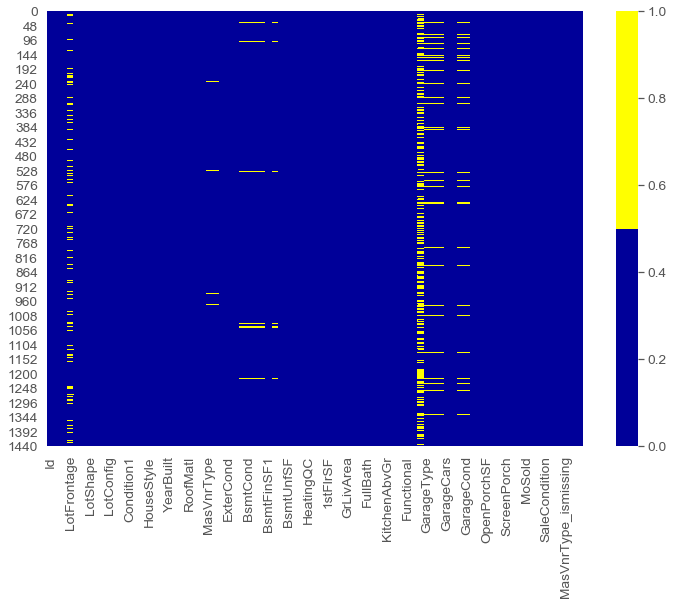

In [122]:
# เช็คข้อมูลยังมี missing value หรืออยู่หรือไม่
# FireplaceQu => 690 ( 47.0 %) 
##------------------------------------------
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00']  
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))

In [123]:
 ## ลบข้อมูล column ที่นำมาเทียบเพื่อหา row misssing value ออก
ismissing_cols = [col for col in df.columns if 'ismissing' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)

##ลบข้อมูลที่ไม่จำเป็นออก
#ismissing_cols = [col for col in df.columns if 'Id' in col] 
#df.drop(df[ismissing_cols],axis=1,inplace=True)

ismissing_cols = [col for col in df.columns if 'num_missing' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)
     

In [124]:
## Replace Mising Value 
# ถ้าเป็นตัวเลขจะ replace ด้วยค่า mean
# ถ้าเป็นตัวอักษร replace ด้วยค่าที่มีความถี่เยอะที่สุด
## replace value 
print(df.shape) 

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)  
    if num_missing > 0:  
        col_chk = '{}'.format(col) 
        print('- {}'.format(col) , '=>' , num_missing)  
        is_number = np.issubdtype(df[col_chk].dtype, np.number) 
        if  is_number :   # Replace number replace mean
             med = df[col].mean()
             df[col] = df[col].fillna(med)
        else : 
              top = df[col].describe()['top'] # Replace string impute with the most frequent value.
              df[col] = df[col].fillna(top)
                
                
print(df.shape) 
df.head()

(1460, 77)
- LotFrontage => 259
- MasVnrType => 8
- MasVnrArea => 8
- BsmtQual => 37
- BsmtCond => 37
- BsmtExposure => 38
- BsmtFinType1 => 37
- BsmtFinType2 => 38
- Electrical => 1
- FireplaceQu => 690
- GarageType => 81
- GarageYrBlt => 81
- GarageFinish => 81
- GarageQual => 81
- GarageCond => 81
(1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


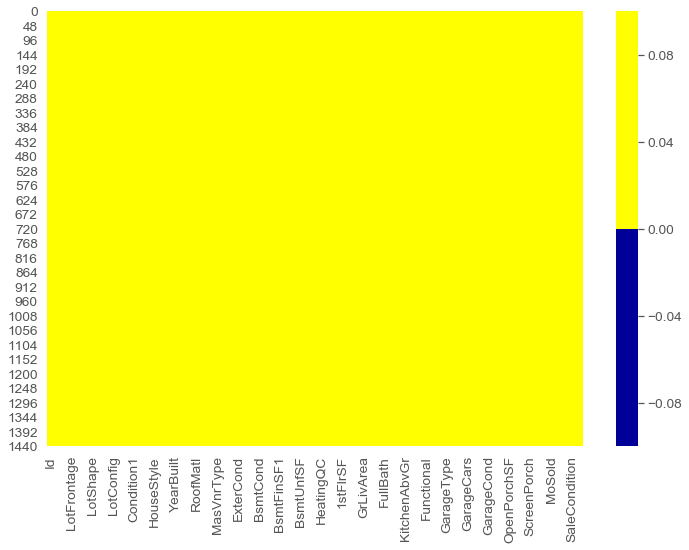

In [125]:
# เช็คข้อมูลยังมี missing value อยู่ 
# จะเห็นได้ว่าไม่มี missing value 
##------------------------------------------
cols1 = df.columns[0:81]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))

In [126]:
# แสดงข้อมูลที่ clean value
##########################

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [127]:
#data number
data_numeric = df.select_dtypes(include=[np.number]) 
print("Number value",data_numeric.shape) 

# data string 
data_non_numeric = df.select_dtypes(exclude=[np.number])
print("String value",data_non_numeric.shape)

# data string ที่ถูกแปลงค่า
t_data = pd.get_dummies(data_non_numeric)
print("convert String",t_data.shape)

v = len(data_numeric.columns.values)+len(t_data.columns.values);
print('ข้อมูล number + string binary ต้องรวมกันได้ =',v,' column')
#แปลงข้อมูล string ให้อยู่ในระบบ binary ดังตัวอย่าง

df_convert = pd.get_dummies(df)
df_convert.head()

Number value (1460, 38)
String value (1460, 39)
convert String (1460, 239)
ข้อมูล number + string binary ต้องรวมกันได้ = 277  column


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [128]:
# ตัวอย่างการแปลงค่าจาก string to binary
#โดยจะดึงค่า row มาแสดงเป็น column ทำให้ค่า column เพิ่มขึ้น
################################################
col_ex = df["LandContour"] 
xxx =  pd.get_dummies(col_ex)
xxx.head()

,Bnk,HLS,Low,Lvl
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


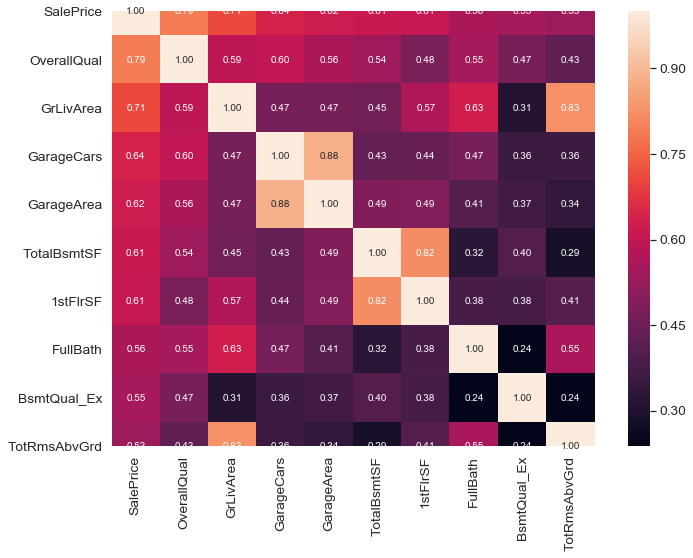

In [129]:
###########################################
#  ตัวอย่าง การแสดง histogram ถ้าค่า k = 10
########################################
cols_test=[]

if set(['SalePrice']).issubset(df_convert.columns):
    corrmat_test = df_convert.corr() 
    corr_test = corrmat_test.sort_values('SalePrice') 
    cols_test = corr_test['SalePrice'][corr_test['SalePrice'].values > 0.2].index.values  
    k_test = 10 #ต้องการใช้ข้อมูล top xx มาใช้
    cols_test = corrmat_test.nlargest(k_test, 'SalePrice')['SalePrice'].index 

    cm_test = np.corrcoef(df_convert[cols_test].values.T)
    sns.set(font_scale=1.25)
    hm_test = sns.heatmap(cm_test, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_test.values, xticklabels=cols_test.values)
    plt2.show()
         
else:
  print("No display . Display When SalePrice Column ")

 

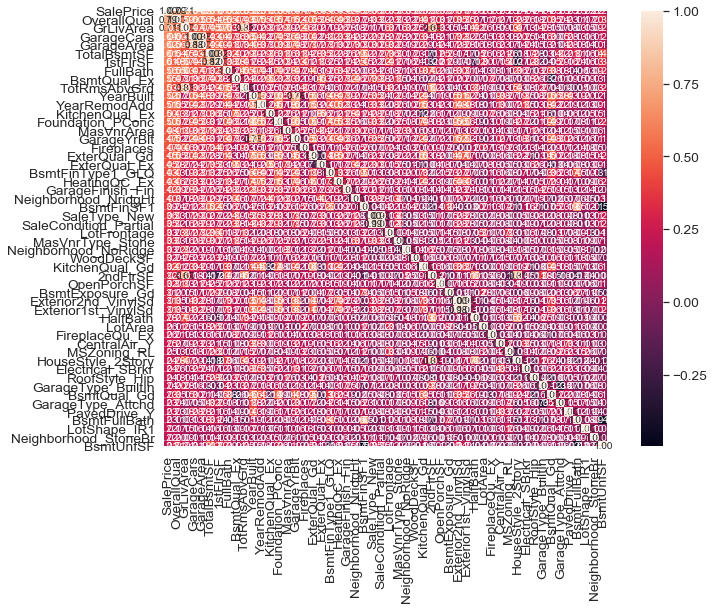

In [130]:
#ดูความสัมพันธ์ของข้อมูลเพื่อเลือก Feature เพื่อ เลือก feature
# https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#.core() for ignore not string
# Pearson Coefficient of Correlation
########################################
cols=[]

if set(['SalePrice']).issubset(df_convert.columns):
    corrmat = df_convert.corr() 
    corr = corrmat.sort_values('SalePrice') 
    cols = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values  
    k = len(cols) #ต้องการใช้ข้อมูล top xx มาใช้
    cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 

    cm = np.corrcoef(df_convert[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
         
else:
  print("No display . Display When SalePrice Column ")

 

In [131]:
most_corr=[]
if set(['SalePrice']).issubset(df.columns):
    most_corr = pd.DataFrame(cols)
    most_corr.columns = ['Most Correlated Features']

most_corr


,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,BsmtQual_Ex
9,TotRmsAbvGrd


In [132]:
##################################
## พิจารณาที่ SalePrice เพื่อดูข้อมูล Min , max
##################################
#df.describe(include='all')
dis=[]
try:
     dis=df_convert['SalePrice'].describe();
except KeyError:
    print(f"Unknow Field Sale Price")
 
dis
 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [133]:
############################################
## ต้อง min-max normolize ข้อมูลที่ clean outlier แล้ว
############################################
arr_zero = [] 
count=0
def min_max_normalize(ColName):
    try:
        min_val = min(df_convert[ColName])
        max_val = max(df_convert[ColName])
         
        print(f" {count } :  min : {min_val}, max : {max_val}, column  : {ColName}")
        if((min_val == max_val ) ): 
             arr_zero.append(ColName)
        
        fraction = (max_val - min_val)
        if(fraction > 0 ):
            df_convert[ColName]=df_convert[ColName].apply(lambda x: (x-min_val) / fraction)
        else :
            df_convert[ColName] = 0;  
            
        
        #for it in df[ColName]:
        #    it = (it-min_val) / (max_val - min_val)
        #   print(it)
        
    except KeyError:
        print(f"Error Min-Max Normalize ! Unknow Field"+ColName)
      
        
        
############################################       
## หา outlier ของข้อมูลและ set ใส่ค่าเพื่อระบุว่าจะใช้ "is_select_"
##########################################################

def func_convertReplaceOulier(ColName):
    try:
        field_select_name = "is_select_"+ColName
        Q1 = df_convert[ColName].quantile(0.25)
        Q3 = df_convert[ColName].quantile(0.75)
        df_convert[field_select_name] = np.where(df_convert[ColName] < Q1, Q1,df_convert[ColName])
        df_convert[field_select_name] = np.where(df_convert[ColName] > Q3, Q3,df_convert[ColName])
        
        # ทำ min-max Normolize ต่อ
        min_max_normalize(field_select_name)
    except KeyError: 
        print(f' Column : {ColName} is error outlier')
  
 

In [134]:
## ทดลองหา Clean Outler Sale Price
if set(['SalePrice']).issubset(df_convert.columns):
    tmp_outlier= "SalePrice"
    func_convertReplaceOulier(tmp_outlier)
    df_convert["is_select_"+tmp_outlier].describe()


 0 :  min : 34900.0, max : 214000.0, column  : is_select_SalePrice


In [135]:
## Loop for Clean Field 
# ถ้าข้อมูลน้อยกว่า min ให้ replace min , ถ้าข้อมูลมากกว่า max ให้ replace max
############################## 
## example
### 1	OverallQual
#func_convertReplaceOulier("OverallQual")
###############################################
arr_zero = []
count=0

if set(['SalePrice']).issubset(df_convert.columns):
    all_column = most_corr["Most Correlated Features"]
    for col in all_column:
        count +=1
        func_convertReplaceOulier(col) 
else : ## case กรณีเป็นข้อมูลไฟล์ test จะดึงข้อมูล train ที่คลีนก่อนหน้าเพื่อมาหา column ที่ทำการ clean เพื่อให้ข้อมูลตรงกัน
    data_train = pd.read_csv('file_price_house/train_clean.csv') 
    for col_t in data_train.columns:# loop เอา column ทั้งหด
        if 'is_select_'  in col_t: 
            col_s =col_t.replace("is_select_","")   
            #print(col_s)
            func_convertReplaceOulier(col_s)
            
#แสดงแค่ข้อมูลที่เลือก
IsSelect = [col for col in df_convert.columns if 'is_select_'  in col] 
df_convert[IsSelect].head()

 1 :  min : 34900.0, max : 214000.0, column  : is_select_SalePrice
 2 :  min : 1.0, max : 7.0, column  : is_select_OverallQual
 3 :  min : 334.0, max : 1776.75, column  : is_select_GrLivArea
 4 :  min : 0.0, max : 2.0, column  : is_select_GarageCars
 5 :  min : 0.0, max : 576.0, column  : is_select_GarageArea
 6 :  min : 0.0, max : 1298.25, column  : is_select_TotalBsmtSF
 7 :  min : 334.0, max : 1391.25, column  : is_select_1stFlrSF
 8 :  min : 0.0, max : 2.0, column  : is_select_FullBath
 9 :  min : 0.0, max : 0.0, column  : is_select_BsmtQual_Ex
 10 :  min : 2.0, max : 7.0, column  : is_select_TotRmsAbvGrd
 11 :  min : 1872.0, max : 2000.0, column  : is_select_YearBuilt
 12 :  min : 1950.0, max : 2004.0, column  : is_select_YearRemodAdd
 13 :  min : 0.0, max : 0.0, column  : is_select_KitchenQual_Ex
 14 :  min : 0.0, max : 1.0, column  : is_select_Foundation_PConc
 15 :  min : 0.0, max : 164.25, column  : is_select_MasVnrArea
 16 :  min : 1900.0, max : 2001.0, column  : is_select_Ga

,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_BsmtQual_Ex,is_select_TotRmsAbvGrd,...,is_select_Electrical_SBrkr,is_select_RoofStyle_Hip,is_select_GarageType_BuiltIn,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_Neighborhood_StoneBr,is_select_BsmtUnfSF
0,0.969291,1.000000,0.953734,1.0,0.951389,0.659349,0.493734,1.0,0,1.0,...,1.0,0,0,1.0,1.0,1.0,1.0,0.0,0,0.185644
1,0.818537,0.833333,0.643216,1.0,0.798611,0.972078,0.877749,1.0,0,0.8,...,1.0,0,0,1.0,1.0,1.0,0.0,0.0,0,0.351485
2,1.000000,1.000000,1.000000,1.0,1.000000,0.708646,0.554268,1.0,0,0.8,...,1.0,0,0,1.0,1.0,1.0,1.0,1.0,0,0.537129
3,0.586823,1.000000,0.958586,1.0,1.000000,0.582322,0.593048,0.5,0,1.0,...,1.0,0,0,0.0,0.0,1.0,1.0,1.0,0,0.668317
4,1.000000,1.000000,1.000000,1.0,1.000000,0.881956,0.767084,1.0,0,1.0,...,1.0,0,0,1.0,1.0,1.0,1.0,1.0,0,0.606436


In [136]:
#พบข้อมูลที่มี ค่า min = max เป็น 0
#จึงได้ทำการลบข้อมูล
IsSelect = [col for col in df_convert.columns if 'is_select_'  in col] 
print('ข้อมูล min = max : ',len(arr_zero), ' column')
print("before drop Feature : ",df_convert.shape)
#print(arr_zero) 
df_convert.head()  

try:
    if(len(arr_zero) > 0): #drop
        for col in arr_zero:
            if set([col]).issubset(df_convert.columns):
                df_convert.drop(col, axis = 1, inplace = True)
                
except KeyError: 
        print(f' Error Something....')

print("after drop Feature : ",df_convert.shape)

df_convert.head() 
 
 

ข้อมูล min = max :  14  column
before drop Feature :  (1460, 329)
after drop Feature :  (1460, 315)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.185644
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.351485
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.537129
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.668317
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.606436


In [137]:
# All Feature is Select
#############################

IsSelect = [col for col in df_convert.columns if 'is_select_' in col] 
print(df_convert[IsSelect].shape)
df_convert[IsSelect].head()

(1460, 38)


,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,0.969291,1.000000,0.953734,1.0,0.951389,0.659349,0.493734,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.185644
1,0.818537,0.833333,0.643216,1.0,0.798611,0.972078,0.877749,1.0,0.8,0.812500,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.351485
2,1.000000,1.000000,1.000000,1.0,1.000000,0.708646,0.554268,1.0,0.8,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.537129
3,0.586823,1.000000,0.958586,1.0,1.000000,0.582322,0.593048,0.5,1.0,0.335938,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.668317
4,1.000000,1.000000,1.000000,1.0,1.000000,0.881956,0.767084,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.606436


In [138]:
#Save File Create for wait model

import pandas as pd 
df_convert.head() 
pd.DataFrame(df_convert).to_csv("file_price_house/"+define_fileName+"_clean.csv")